# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [2]:
#your code here
import requests
import io
import zipfile

# Access zip file from url and unpack
req = requests.get('https://github.com/chadwickbureau/baseballdatabank/archive/master.zip')
master = zipfile.ZipFile(io.BytesIO(req.content))
master.extractall()

In [3]:
# Read required csv files into pandas DataFrames
salaries = pd.read_csv(master.open("baseballdatabank-master/core/Salaries.csv"))
teams = pd.read_csv(master.open("baseballdatabank-master/core/Teams.csv"))

In [4]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [5]:
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [6]:
#your code here
total_salaries = salaries.groupby(by=['teamID','yearID'], as_index=False)['salary'].sum()

In [7]:
total_salaries.head()

,teamID,yearID,salary
0,ANA,1997,31135472
1,ANA,1998,41281000
2,ANA,1999,55388166
3,ANA,2000,51464167
4,ANA,2001,47535167


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [8]:
#your code here

# create a view of the 'teams' dataframe with only relevant data
wins = teams[['teamID', 'yearID', 'W']] 
# merge with total_salaries on yearID and teamID
total_salaries_merged = pd.merge(left=total_salaries, right=wins,
                                 on=['teamID', 'yearID'], how='left')

In [9]:
total_salaries_merged.head()

,teamID,yearID,salary,W
0,ANA,1997,31135472,84
1,ANA,1998,41281000,85
2,ANA,1999,55388166,70
3,ANA,2000,51464167,82
4,ANA,2001,47535167,75


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

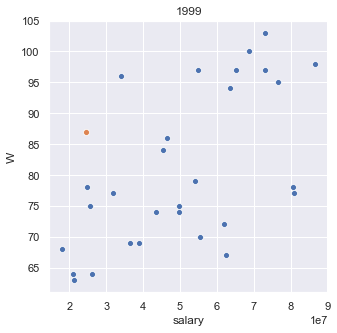

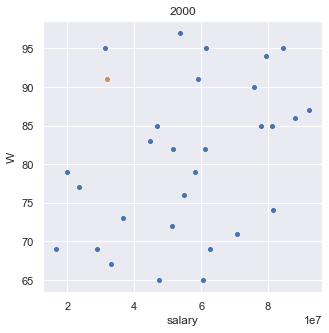

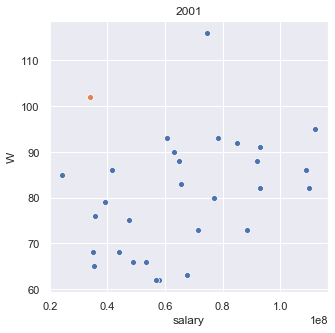

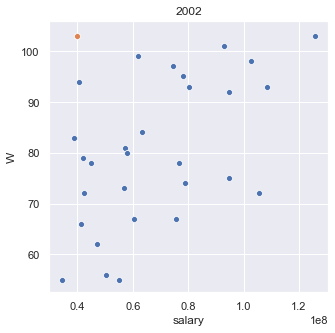

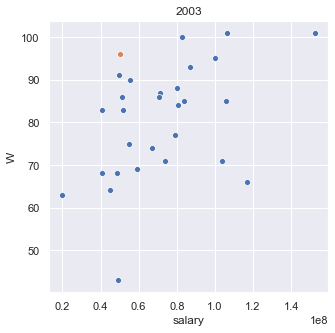

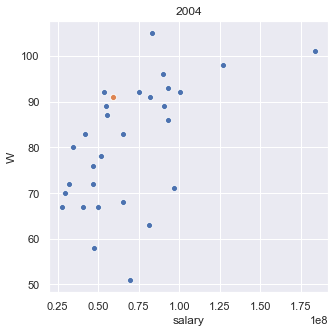

In [12]:
#your code here
import seaborn as sns

sns.set()

pallete = sns.color_palette("RdBu", n_colors=3)

for year in np.arange(1999, 2005, 1):
    plt.figure(figsize=(5,5))
    sns.scatterplot(x='salary', y='W', data=total_salaries_merged[total_salaries_merged['yearID']==year])
    sns.scatterplot(x='salary', y='W', 
                    data=total_salaries_merged[(total_salaries_merged['yearID']==year) & (total_salaries_merged['teamID']=='OAK')])
    plt.title(str(year))


In [12]:
total_salaries_merged['teamID'].unique()

array(['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CAL', 'CHA', 'CHN', 'CIN',
       'CLE', 'COL', 'DET', 'FLO', 'HOU', 'KCA', 'LAA', 'LAN', 'MIA',
       'MIL', 'MIN', 'ML4', 'MON', 'NYA', 'NYN', 'OAK', 'PHI', 'PIT',
       'SDN', 'SEA', 'SFN', 'SLN', 'TBA', 'TEX', 'TOR', 'WAS'],
      dtype=object)

In [13]:
print(np.sort(total_salaries_merged['yearID'].unique()))

[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016]


In [14]:
total_salaries_merged.dtypes

teamID    object
yearID     int64
salary     int64
W          int64
dtype: object

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

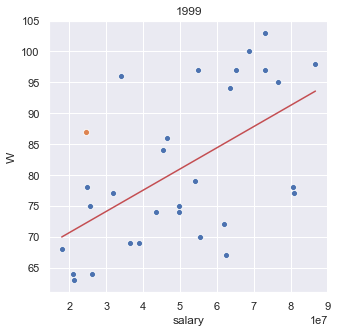

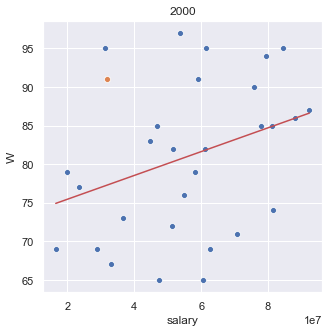

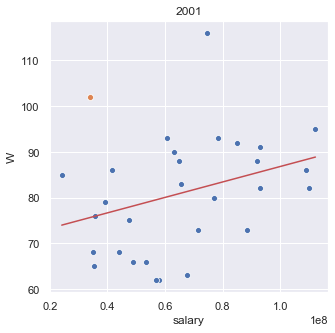

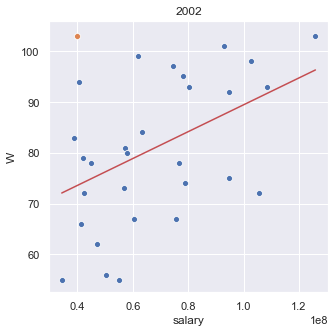

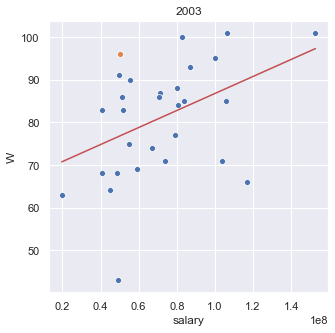

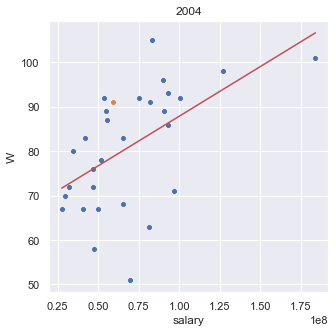

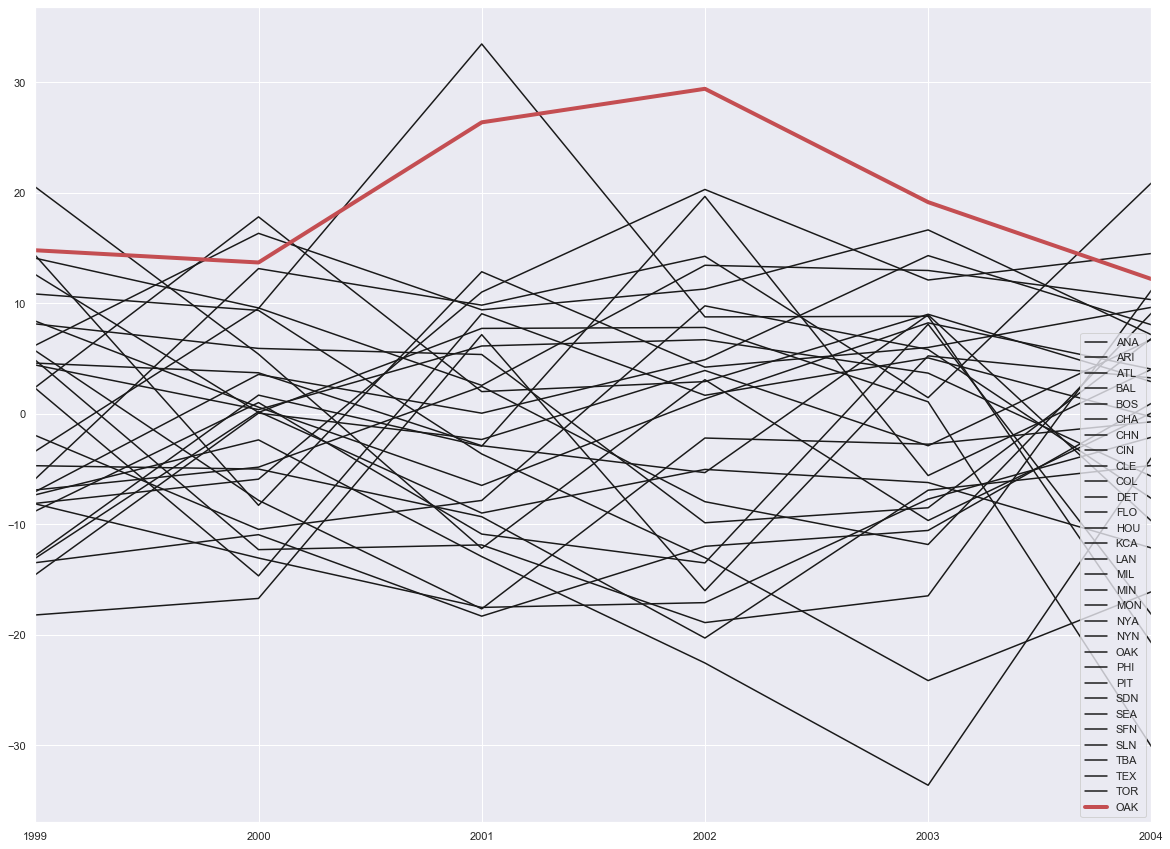

In [13]:
#your code here
import sklearn
from sklearn.linear_model import LinearRegression

residuals=[]
years=[]
teams=[]
res_df=pd.DataFrame()
for year in np.arange(1999, 2005, 1):
    data = total_salaries_merged[total_salaries_merged['yearID']==year]
    x_raw = data['salary'].values
    x = data['salary'].values.reshape((-1, 1))
    y = data['W'].values

    reg = LinearRegression()
    reg.fit(x, y)
    residual = (y - reg.predict(x))
    
    temp_df = pd.DataFrame(data=residual.reshape(1,-1), columns=data['teamID'].values, index=[year])
    years.append(year)
    frames = [res_df, temp_df]
    res_df = pd.concat(frames, join='outer', sort=True)
    #print(year)
    #print(type(data['teamID'].values))
    #print(data['teamID'].values.shape)
    #print(type(residual))
    #print(residual.shape)
    plt.figure(figsize=(5,5))
    sns.scatterplot(x='salary', y='W', data=total_salaries_merged[total_salaries_merged['yearID']==year])
    sns.scatterplot(x='salary', y='W', 
                    data=total_salaries_merged[(total_salaries_merged['yearID']==year) & (total_salaries_merged['teamID']=='OAK')])
    plt.title(str(year))
    sns.lineplot(x=x_raw, y=reg.predict(x), color='r')
    #sns.scatterplot(x=x_raw, y=y)

#sns.scatterplot(x=years, y=residuals)
ax1 = res_df.plot.line(y=[team for team in res_df.columns if team is not "OAK"],figsize=(20,15), color='k')
res_df.plot.line(y='OAK', color='r', ax=ax1, linewidth=4)

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---

Scatter plots (Wins versus Team Salary) have been used in order to assess the relative performance of each team. One hypothesis is that the total salary for each team would be correlated to the performance. Testing this hypothesis is somewhat difficult using scatter plots alone. Fitting a linear regresssion model and plotting against the raw data has shown that this hyppthesis does not hold true for all seasons (little correlation between salary and number of wins), but appears valid for the majority of seasons. Statistical methods (R score, etc.) could be used to identify the seasons with a high level of correlation, but has not been done here. 

A clear competitive advantage can been observed in the 2001-2003 seasons, as evidenced by the Oaklands position in the upper left quadrant of the scatter chart. This advantage appears to disappear rapidely, being less pronounced in 2004 and onwards. Interestingly, Oakland appears to have regained some advantage in 2013-2014, while maintaining a relatively low Team Salary. Again, this advantage disappears quickly.

Plotting the residuals on the linear model on a line chart (residual versus year), helps to illustrate these observations. High positive residuals are observed for Oakland in the 2001-2003 and 2013-2014 seasons.

## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [23]:
#your code here
countries = pd.read_csv('https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv')
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [24]:
#your code here

# The provided link no longer exists. The relevant csv file has been downloaded manually from Gapminder

income = pd.read_csv('./HW1_Data/gnipercapita_ppp_current_international.csv')
income.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1250.0,1490.0,1590.0,1680,1900.0,1940.0,1950.0,1940.0,1970.0,2000.0
1,Albania,2720.0,1950.0,1830.0,2130.0,2400.0,2830.0,3180.0,2900.0,3300.0,...,8270.0,8670.0,9540.0,10200,10500.0,10800.0,11400.0,11500.0,11800.0,12100.0
2,Algeria,6390.0,6270.0,6400.0,6340.0,6250.0,6420.0,6680.0,6820.0,7170.0,...,12100.0,12100.0,12600.0,12900,13200.0,13400.0,13900.0,14200.0,14900.0,15100.0
3,Angola,1980.0,2240.0,880.0,880.0,690.0,1550.0,1560.0,1890.0,1880.0,...,4810.0,5200.0,5210.0,5360,5550.0,5900.0,6130.0,6250.0,6090.0,6060.0
4,Antigua and Barbuda,9540.0,10300.0,10600.0,11400.0,12100.0,11500.0,12200.0,12800.0,13300.0,...,22100.0,19400.0,18300.0,18000,18600.0,19000.0,20000.0,21000.0,22100.0,23000.0


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [25]:
#your code here

# using stack/unstack to reverse the index and the columns. Pivot might also work.

stacked = income.set_index('country').stack()
unstacked = stacked.unstack(0)
unstacked.head()

country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1990,NaN,2720.0,6390.0,1980.0,9540.0,6680.0,2330.0,16700.0,19500.0,NaN,...,17000.0,23700.0,6130.0,NaN,1690.0,9190.0,880.0,2140.0,1380.0,1630.0
1991,NaN,1950.0,6270.0,2240.0,10300.0,7780.0,2230.0,17100.0,20600.0,NaN,...,17400.0,24200.0,6600.0,NaN,1560.0,10200.0,950.0,2170.0,1350.0,1730.0
1992,NaN,1830.0,6400.0,880.0,10600.0,8890.0,1130.0,17500.0,21300.0,NaN,...,18000.0,25200.0,7270.0,1760.0,1550.0,10600.0,1060.0,2310.0,1340.0,1560.0
1993,NaN,2130.0,6340.0,880.0,11400.0,9570.0,1180.0,18600.0,21800.0,3360.0,...,18800.0,26000.0,7600.0,1730.0,1680.0,10700.0,1140.0,2350.0,1470.0,1590.0
1994,NaN,2400.0,6250.0,690.0,12100.0,10200.0,1420.0,19600.0,22600.0,2720.0,...,20200.0,27400.0,8250.0,1640.0,1640.0,10400.0,1260.0,2440.0,1350.0,1730.0


In [32]:
unstacked[unstacked.index=='2000'].sort_values(axis=1, by='2000').values

array([[  430.,   450.,   490.,   540.,   590.,   610.,   620.,   640.,
          670.,   700.,   780.,   820.,   840.,   900.,   990.,  1040.,
         1040.,  1050.,  1100.,  1120.,  1150.,  1160.,  1180.,  1180.,
         1220.,  1310.,  1330.,  1340.,  1380.,  1440.,  1490.,  1550.,
         1590.,  1670.,  1710.,  1740.,  1800.,  1860.,  1870.,  1890.,
         1940.,  1940.,  1950.,  1960.,  1960.,  2040.,  2120.,  2130.,
         2160.,  2200.,  2380.,  2510.,  2540.,  2560.,  2590.,  2630.,
         2690.,  2740.,  2800.,  2840.,  2900.,  2960.,  3040.,  3320.,
         3340.,  3400.,  3430.,  3480.,  3480.,  3630.,  3670.,  3690.,
         3720.,  3920.,  3970.,  4150.,  4170.,  4300.,  4310.,  4720.,
         4760.,  4880.,  4900.,  5010.,  5090.,  5160.,  5390.,  5400.,
         5530.,  5700.,  5720.,  5730.,  5740.,  5800.,  5840.,  5910.,
         5970.,  6010.,  6050.,  6140.,  6220.,  6310.,  6440.,  6650.,
         7140.,  7150.,  7350.,  7370.,  7380.,  7460.,  7690., 

#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

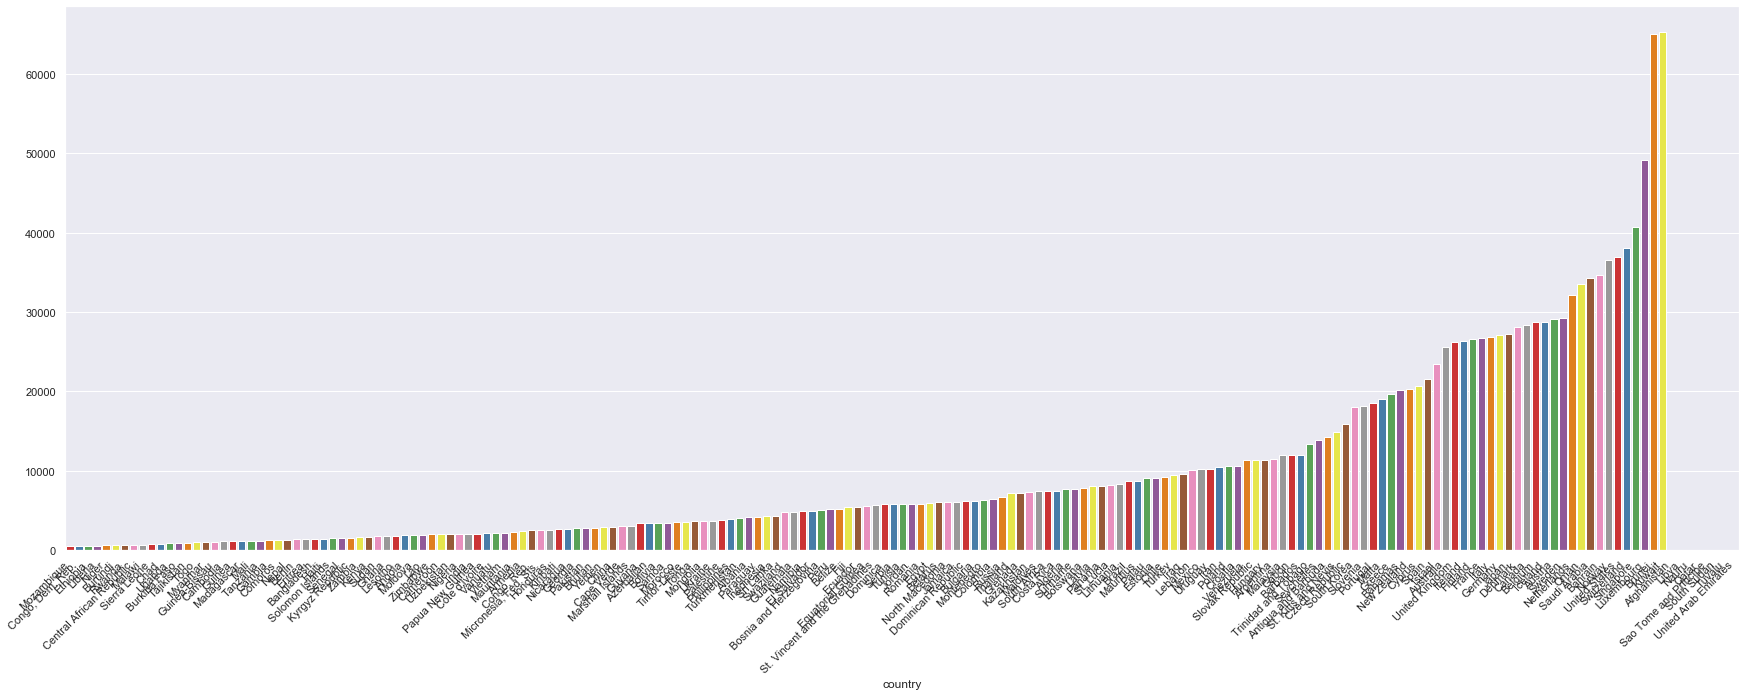

In [197]:
#your code here

# A bar is suited for displaying this type of data.
# Questions: should we sort the data? should we group by region?
fig, ax2 = plt.subplots(figsize=(30,10))
sns.barplot(data=unstacked[unstacked.index=='2000'].sort_values(axis=1, by='2000'), ax=ax2, palette='Set1')
ax2.set_xticklabels(ax2.get_xticklabels(), horizontalalignment='right', rotation=45);

# clearly, grouping and sorting by region would produce a more interesting plot. To do this, we need to first merge with 
# the countries dataframe (see below).

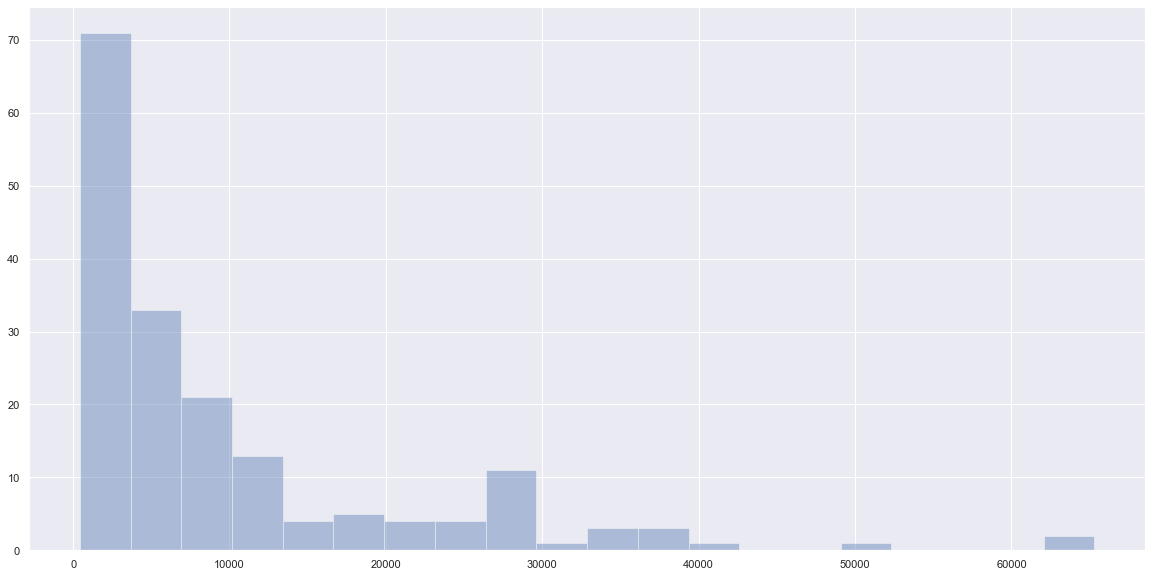

In [37]:
# Maybe a histogram would be better...
year = '2000'
fig, ax2 = plt.subplots(figsize=(20,10))
sns.distplot(a=unstacked[unstacked.index==year].dropna(axis=1), ax=ax2, kde=False, bins=20)

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [39]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here

def mergeByYear(income_df, countries_df, year):
    income_by_year = income_df[['country', year]]
    return pd.merge(income_by_year, countries_df, how='left', left_on='country', right_on='Country').drop(labels='Country', axis=1)

In [40]:
mergeByYear(income, countries, '2010')

,country,2010,Region
0,Afghanistan,1590.0,ASIA
1,Albania,9540.0,EUROPE
2,Algeria,12600.0,AFRICA
3,Angola,5210.0,AFRICA
4,Antigua and Barbuda,18300.0,NORTH AMERICA
...,...,...,...
180,Venezuela,16000.0,SOUTH AMERICA
181,Vietnam,4150.0,ASIA
182,Yemen,4130.0,ASIA
183,Zambia,3000.0,AFRICA


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figu

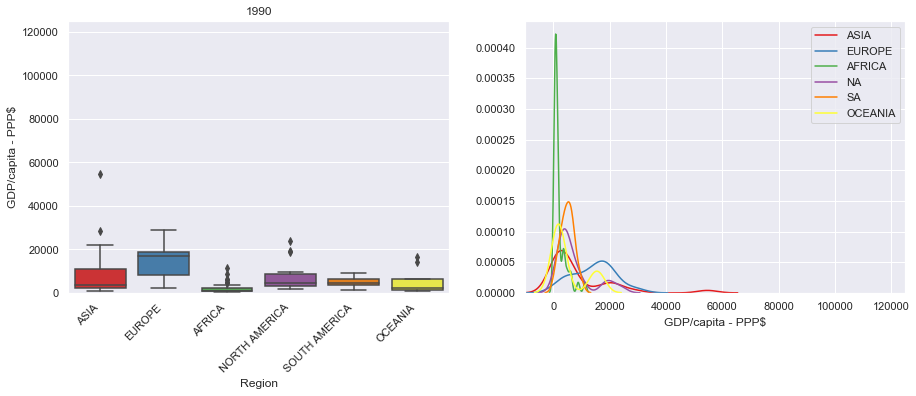

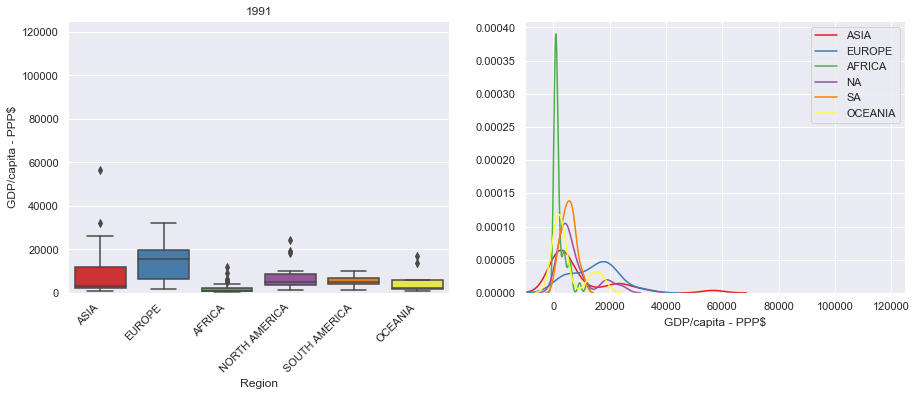

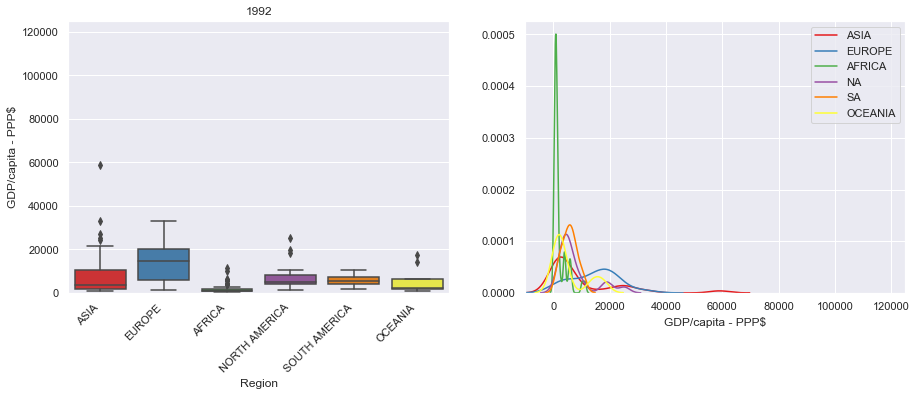

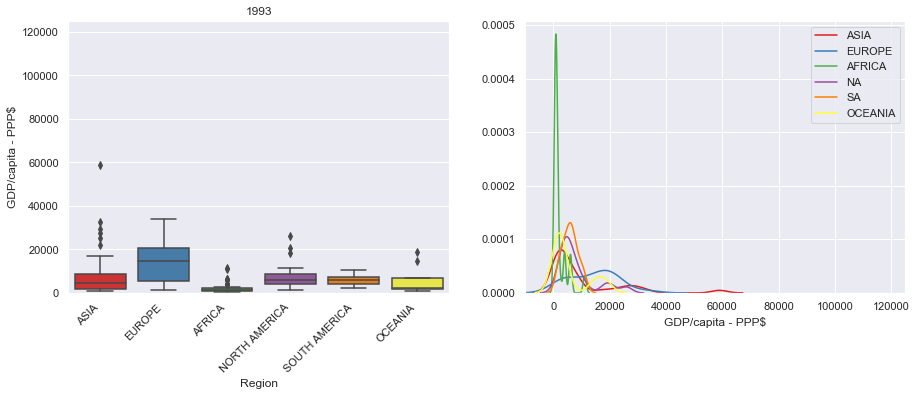

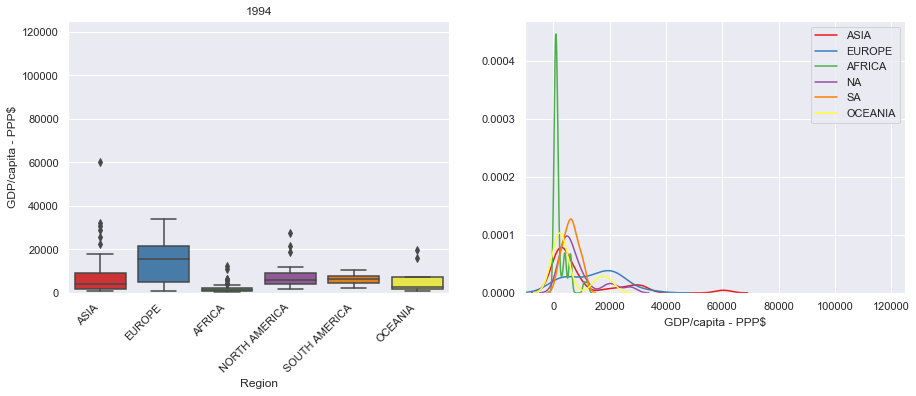

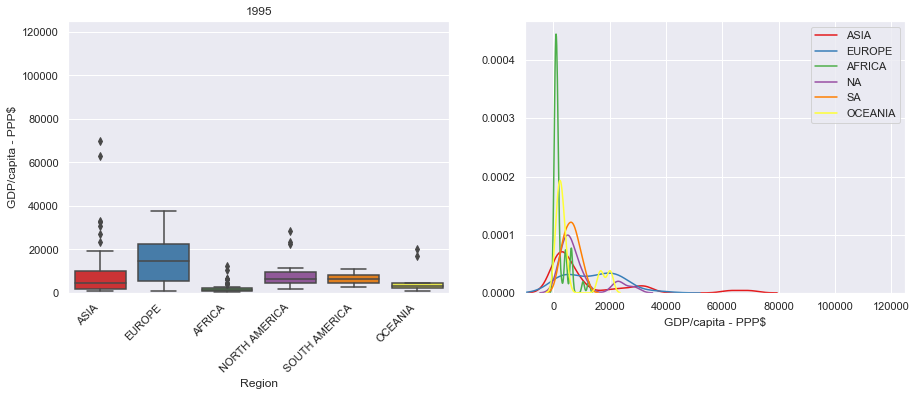

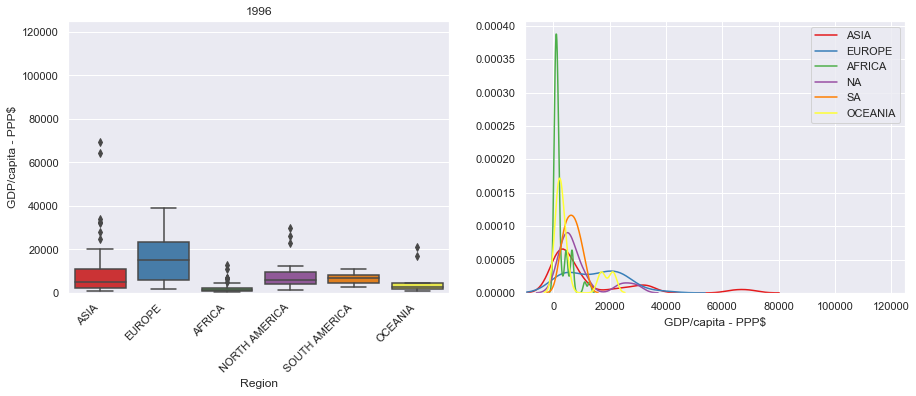

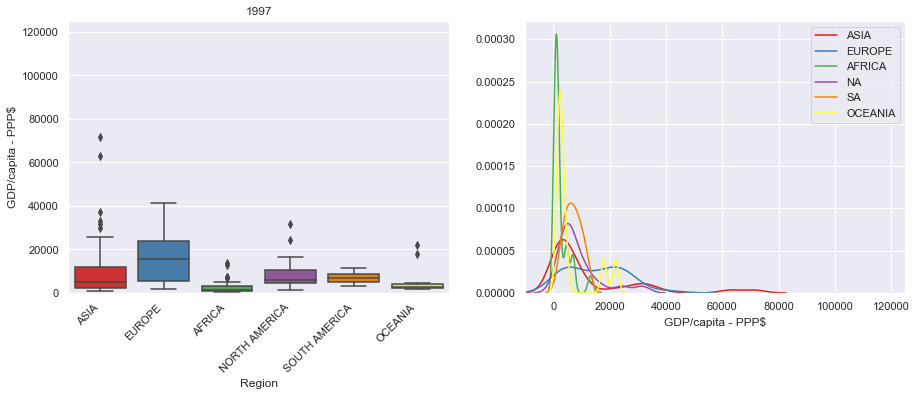

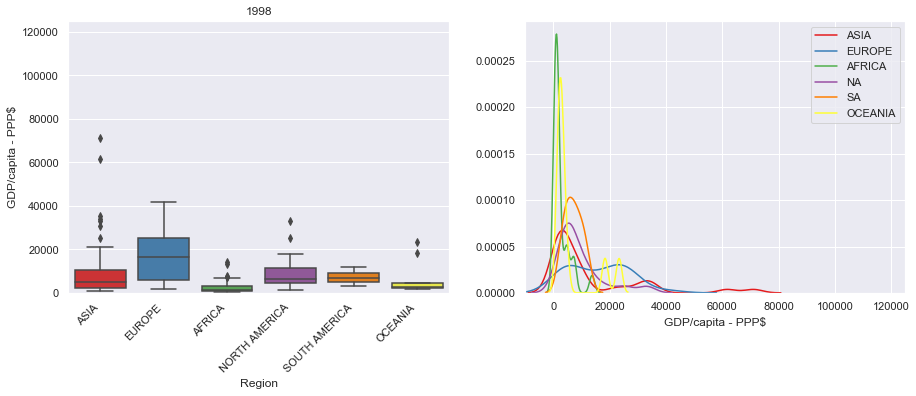

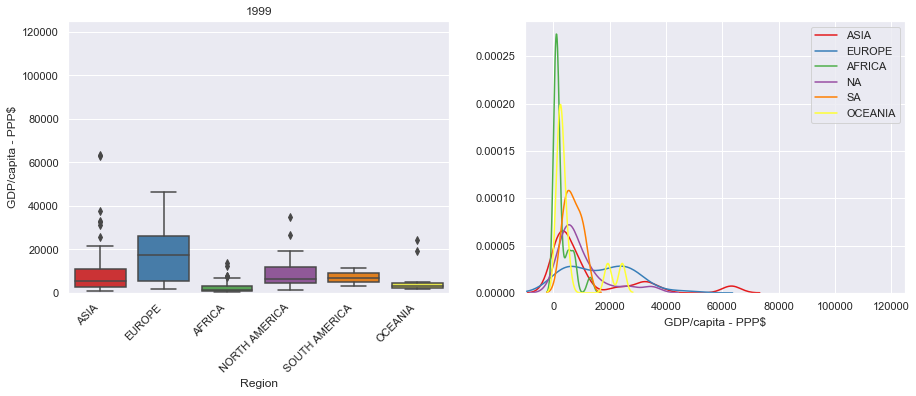

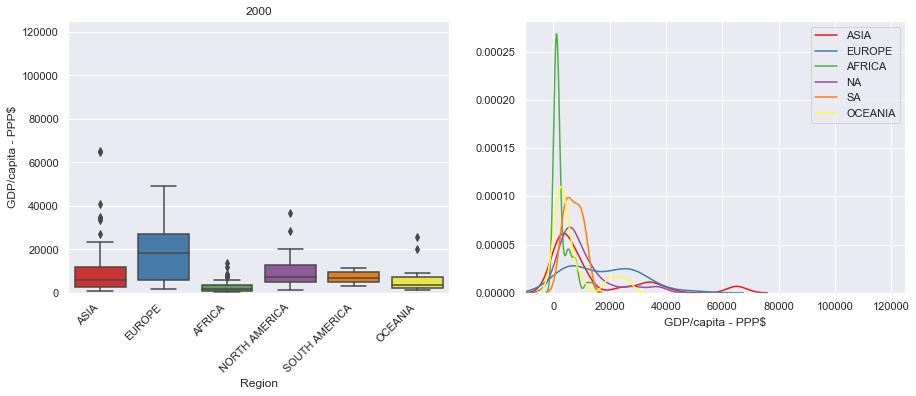

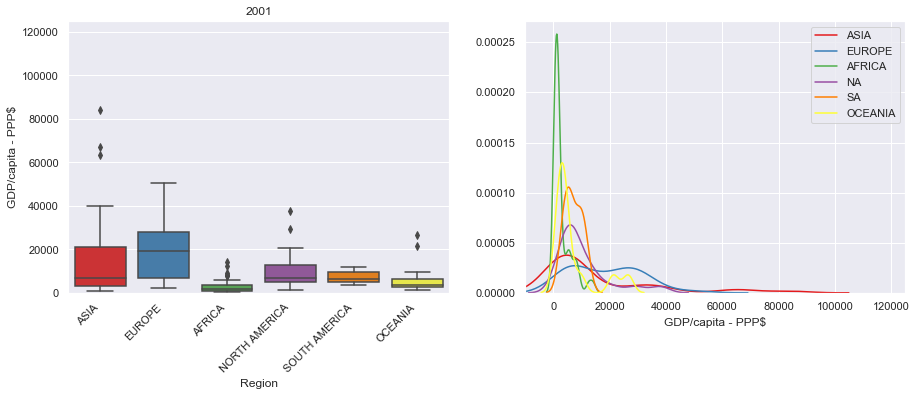

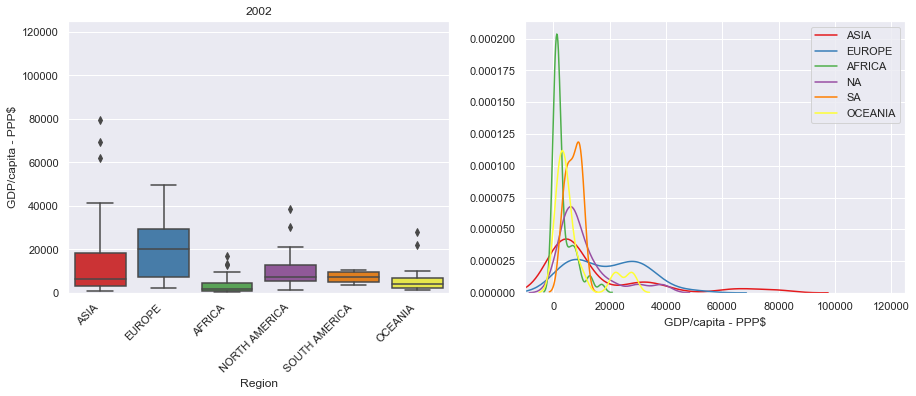

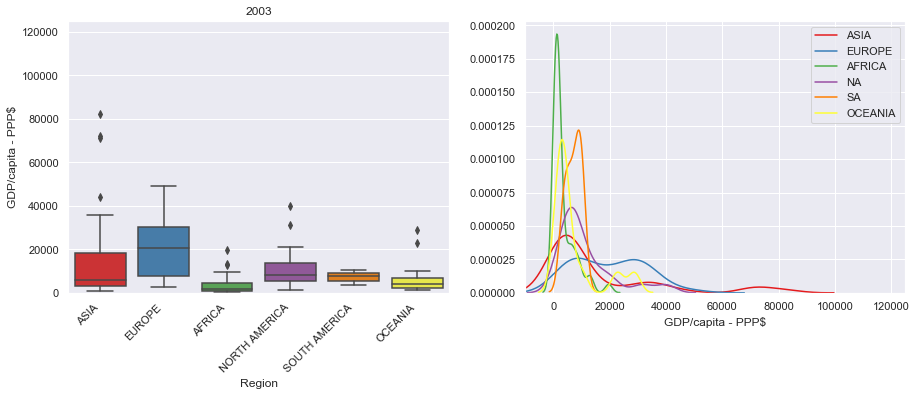

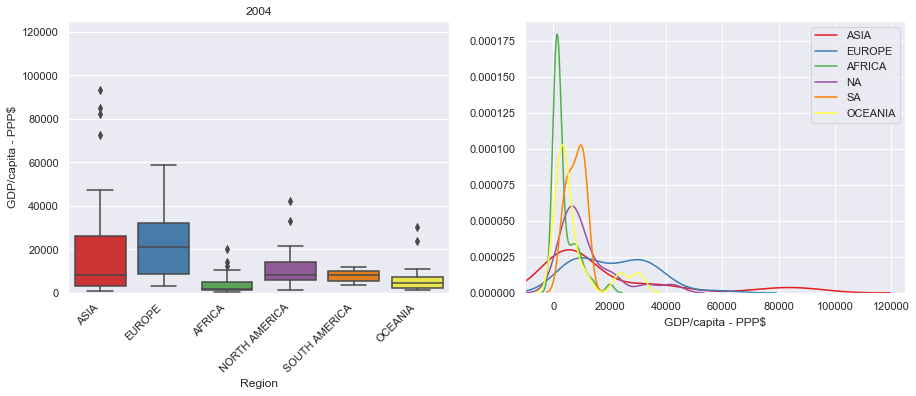

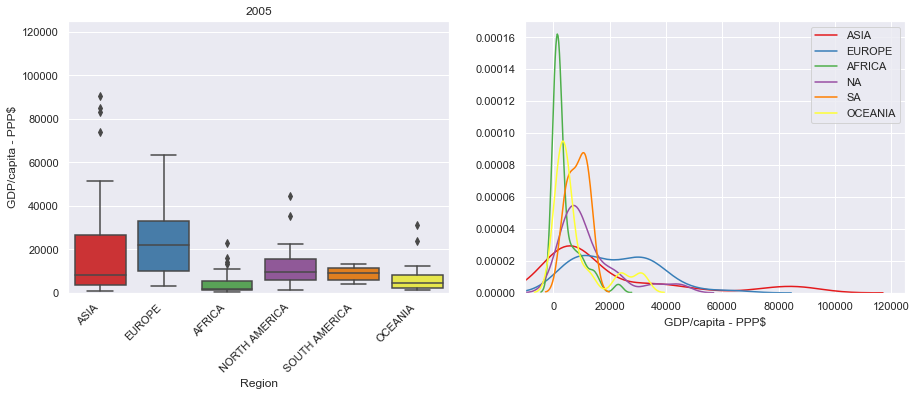

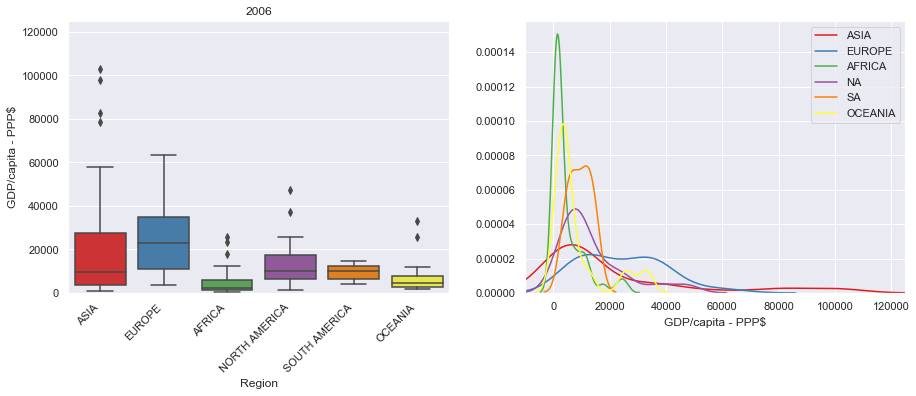

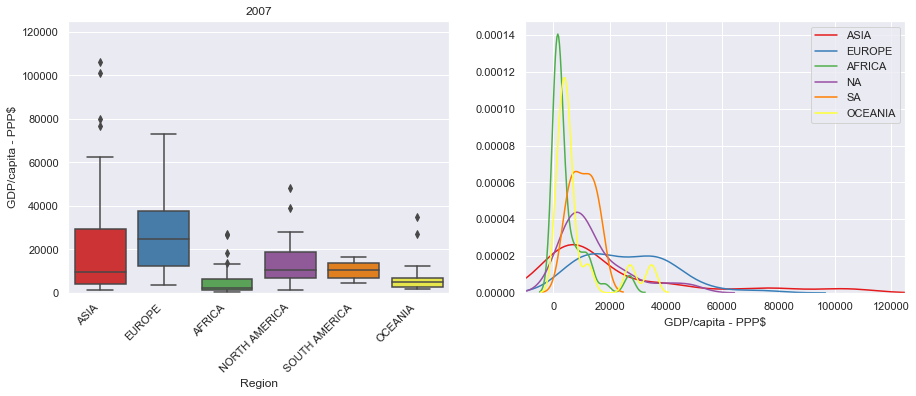

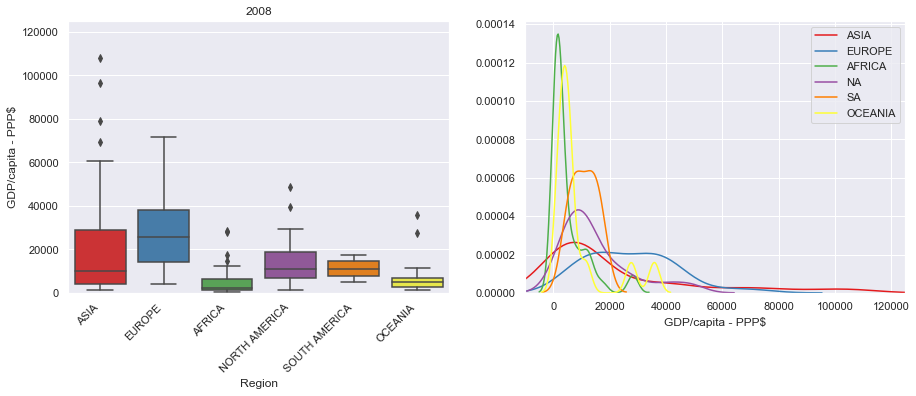

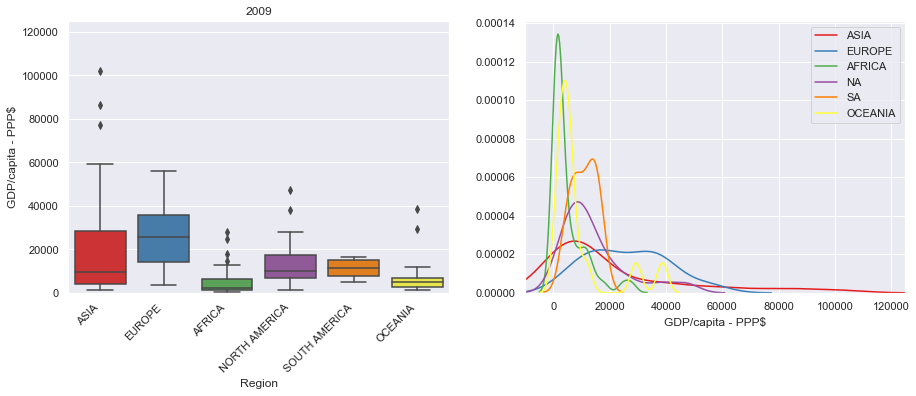

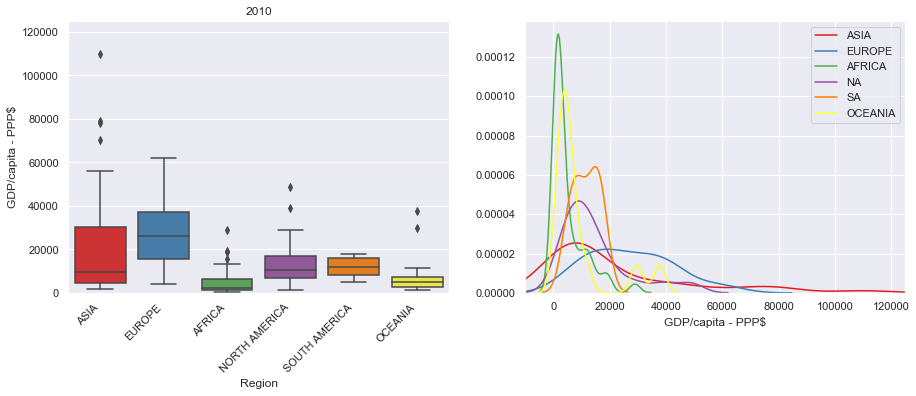

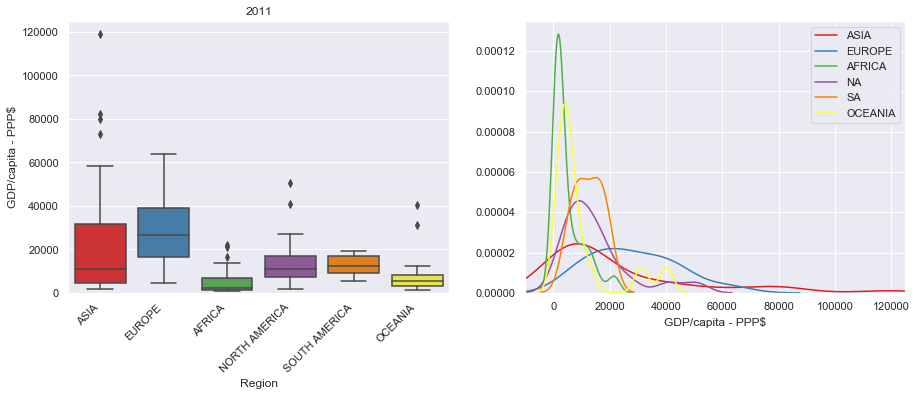

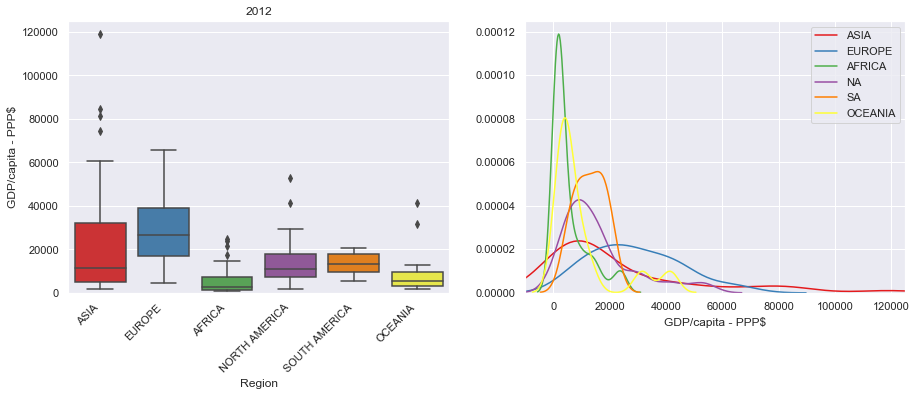

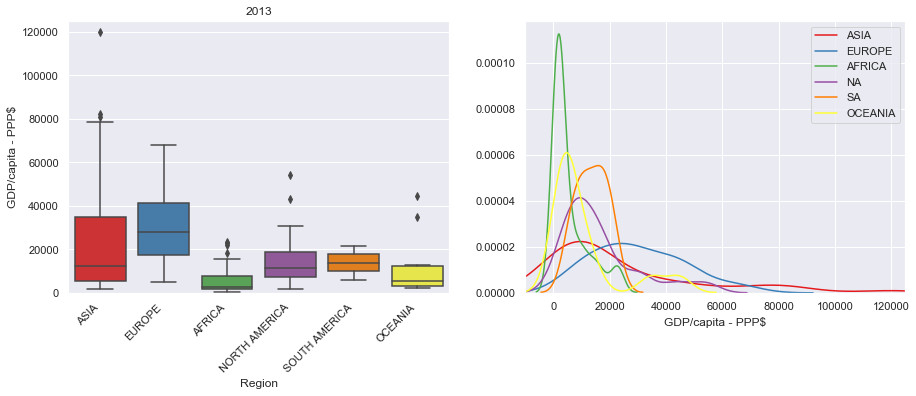

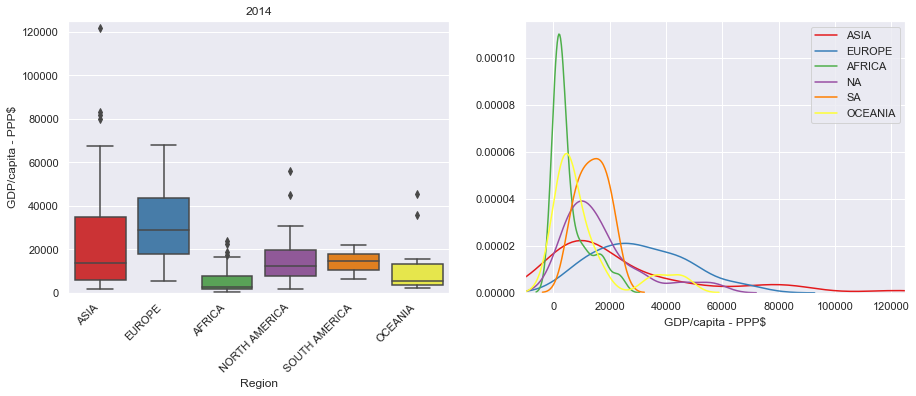

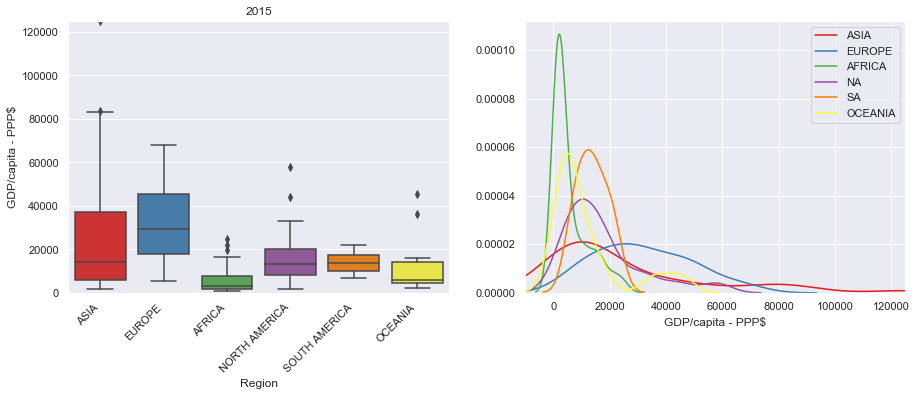

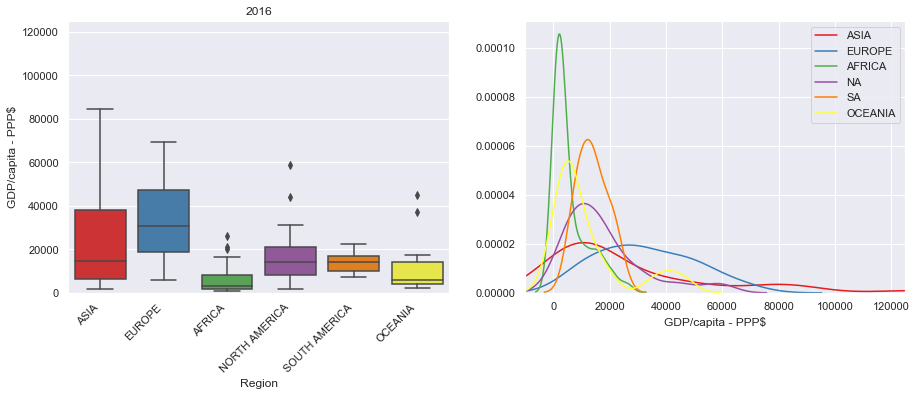

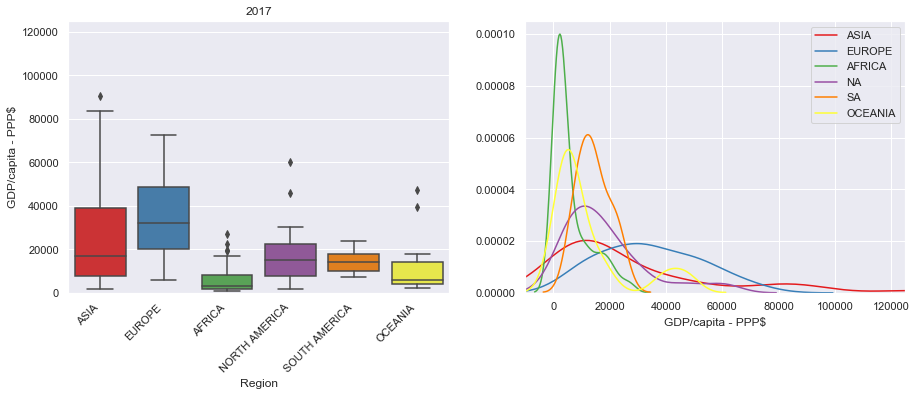

In [204]:
#your code here

for year in income.drop(labels='country', axis=1).columns:
    mergeByYear(income, countries, year)
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    sns.boxplot(x='Region', y=year, data=mergeByYear(income, countries, year), ax=ax1, palette='Set1')
    ax1.set_ylabel('GDP/capita - PPP$')
    ax1.set_title(str(year))
    ax1.set_xticklabels(ax1.get_xticklabels(), horizontalalignment='right', rotation=45);
    ax1.set_ylim((0, 125000))
    histdata = mergeByYear(income, countries, year)
    colors = sns.color_palette(palette='Set1', n_colors=6)
    sns.distplot(a=histdata[histdata['Region']=='ASIA'][year].dropna(), ax=ax2, hist=False, color=colors[0], label='ASIA')
    sns.distplot(a=histdata[histdata['Region']=='EUROPE'][year].dropna(), ax=ax2, hist=False, color=colors[1], label='EUROPE')
    sns.distplot(a=histdata[histdata['Region']=='AFRICA'][year].dropna(), ax=ax2, hist=False, color=colors[2], label='AFRICA')
    sns.distplot(a=histdata[histdata['Region']=='NORTH AMERICA'][year].dropna(), ax=ax2, hist=False, color=colors[3], label='NA')
    sns.distplot(a=histdata[histdata['Region']=='SOUTH AMERICA'][year].dropna(), ax=ax2, hist=False, color=colors[4], label='SA')
    sns.distplot(a=histdata[histdata['Region']=='OCEANIA'][year].dropna(), ax=ax2, hist=False, color=colors[5], label='OCEANIA')
    ax2.set_xlim((-10000, 125000))
    ax2.set_xlabel('GDP/capita - PPP$')
    plt.legend()

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---

In general, additional data wrangling would be benificial to answering the orininal question (i.e. GDP gap between NA/Europe and Asia/Africa/SA). Regrouping by macro-region would allow for more direct comparisons and easier plots. In addition, the exploratory analysis could be improved by ploting versus time (ex. line graph of median GDP versus year).

GDP/capita has globaly increased across all regions during the studied period. This trend was briefly interupted (limited growth or even decrease) in the years 2008 to 2010, which may be correlated with the global financial crisis during that period.

Europe appears to have recorded relatively slow GDP/capita growth during this period, with all other regions, including NA, closing the orgininal gap by some mesure. The largest GDP/capita growth is observed in Asia, while the slowest growth outside of Europe is observed in Africa.

Asia in particular appears to have a "long-tail" distribution of GDP/capita, while SA has the most uniform distribution. Europe starts its journey with a bi-modal distribution, but resembles a gausian distrubtuion in 2017.

## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [41]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here

def ratioNormals(diff, a):
    
    import scipy.stats as stats
    
    return (stats.norm.sf(a, loc=diff, scale=1)) / (stats.norm.sf(a, loc=0, scale=1))

In [43]:
ratioNormals(diff = 1, a = 2)

6.97381686808876

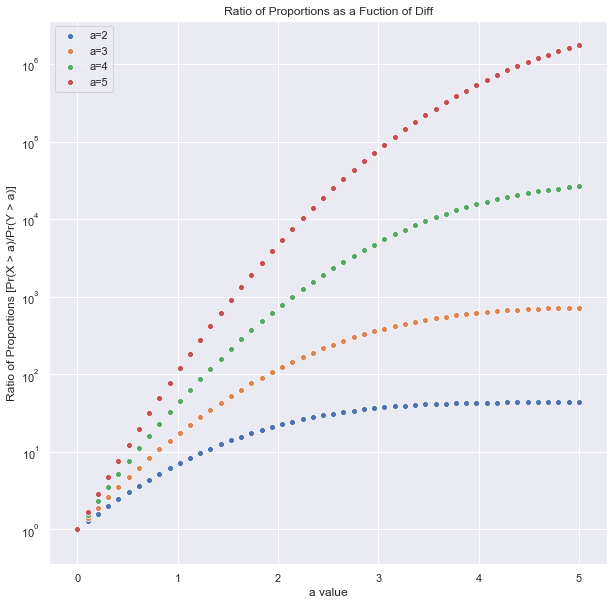

In [51]:
#your code here

diff = 1
a_values = np.array([2, 3, 4, 5])
diffs = np.linspace(0, 5, 50)

fig, ax = plt.subplots(figsize=(10,10))

for a in a_values:
    Y = np.array([ratioNormals(diff=diff, a=a) for diff in diffs])
    sns.scatterplot(x=diffs, y=Y, ax=ax)

plt.legend(["a={}".format(a) for a in a_values], loc=0);
ax.set_xlabel("a value")
ax.set_ylabel("Ratio of Proportions [Pr(X > a)/Pr(Y > a)]")
ax.set_title("Ratio of Proportions as a Fuction of Diff")
plt.yscale('log')

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [68]:
#your code here

df_3b = mergeByYear(income, countries, '2012').groupby(by='Region').mean()
df_3b

# Asia has a higher average GDP/capita than SA:
# Average GDP/capita of Asian countries: ~24k
# Average GDP/capita of SA countries: ~13k

,2012
Region,
AFRICA,5554.468085
ASIA,23980.277778
EUROPE,29180.750000
NORTH AMERICA,16170.000000
OCEANIA,10190.000000
SOUTH AMERICA,13080.833333


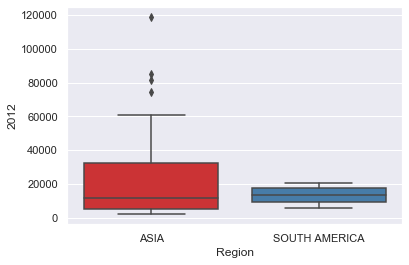

In [69]:
df_3b2 = mergeByYear(income, countries, '2012').reset_index()
df_3b2 = df_3b2.loc[(df_3b2.Region == 'ASIA') | (df_3b2.Region == 'SOUTH AMERICA')]
sns.boxplot(x='Region', y='2012', data=df_3b2, palette='Set1')

#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [75]:
#your code here

def CalcProp(data, region, year):
    
    data_by_region = data[data['Region']==region]
    
    return sum(data_by_region[year]>12000.0) / data_by_region[year].count()

year = '2012'
asia_prop = CalcProp(data=mergeByYear(income, countries, year), region='ASIA', year=year)
sa_prop = CalcProp(data=mergeByYear(income, countries, year), region='SOUTH AMERICA', year=year)
print(asia_prop, sa_prop)

# SA has a higher proportion of countries with GDP/capita greater than 10k, even though Asia has a higher mean GDP/capita.
# This is likely due Asia having a bi-modal distribution with a small number of countries with disproportionally high GDP, 
# while SA has a gaussian distribution. 

0.4722222222222222 0.5


#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [16]:
#your code here

# Can't do this problem because data set no monger exists...

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
